# K-means model 

In this project we will build a Naive Bayes model using the case study below

#### Case Study:  

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 344 penguins, such as species, island, and sex. You will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins especially if penguins of the same species exhibit different physical characteristics based on sex.

## **Step 1: Imports** 


Import relevant packages

In [261]:
# import packages
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [339]:
# load data
penguins = pd.read_csv(r"C:\Users\Ghost\Desktop\project_files\Files\penguins.csv")

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where we can always refer back to if needed.

In [273]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [274]:
penguins.shape

(344, 7)

Generate summary statistics using the `describe()` method.

In [275]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Check value count for categorical features

In [276]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [277]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Check summary information using the `info()` method.

In [278]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Task 2. Data Exploration and Cleaning

check for missing data, duplicates and outliers and handle them accordingly

we will also encode categorical features, drop irrelevant columns, and scale our data


In [279]:
# check for missing values
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [340]:
# drop missing values
penguins = penguins.dropna(axis = 0)

# confirm changes
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Check for number of duplicates using the `duplicated()` method

In [281]:
penguins.duplicated().sum()

0

Check numerical features for outliers using Box Plots

`bill_length_mm`

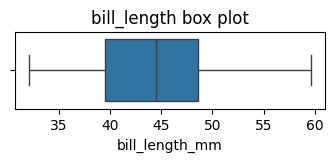

In [282]:
# box plot
plt.figure(figsize = (4,1))
sns.boxplot(x =penguins['bill_length_mm'], fliersize = 1)
plt.title('bill_length box plot')
plt.show()

`bill_depth_mm`

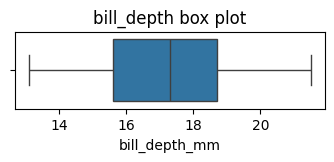

In [283]:
# box plot
plt.figure(figsize = (4,1))
sns.boxplot(x =penguins['bill_depth_mm'], fliersize = 1)
plt.title('bill_depth box plot')
plt.show()

`flipper_length_mm`

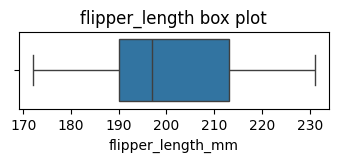

In [284]:
# box plot
plt.figure(figsize = (4,1))
sns.boxplot(x =penguins['flipper_length_mm'], fliersize = 1)
plt.title('flipper_length box plot')
plt.show()

`body_mass_g`

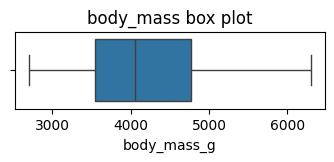

In [285]:
# box plot
plt.figure(figsize = (4,1))
sns.boxplot(x =penguins['body_mass_g'], fliersize = 1)
plt.title('body_mass box plot')
plt.show()

From the boxplot we can see that no feature has a single outlier.

### Encode data

K-means needs numeric columns for clustering. So we convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in our clustering algorithm. 

since the `sex` column only has two classes we can simply use the `np.where()` function to do this.

In [341]:
# convert `sex` column from categorical to numeric.
penguins['sex'] = np.where(penguins['sex'] == 'male', 1, 0)

# confirm changes
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location

In [342]:
# drop the island column.
penguins = penguins.drop('island', axis = 1)

### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling.
This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

Because the species column isn't a feature, it doesn't need to be scaled. 


In [343]:
# exclude `species` variable
penguins_x = penguins.drop('species', axis = 1)

Scale the features using `StandardScaler`

In [344]:
# scale the features.
# assign the scaled data to variable `penguins_x_scaled`.
penguins_x_scaled = StandardScaler().fit_transform(penguins_x)
penguins_x_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 , -1.00904996],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927,  0.99103121],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466, -1.00904996],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906,  0.99103121]])

## **Step 3: Data modeling** 

Now, we fit K-means and evaluate inertia for different values of k. Because we may not know how many clusters exist in the data, so we start by fitting K-means and examining the inertia values for different values of k. To do this, let's write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`penguins_x_scaled`) and returns a list of each k-value's inertia.

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [345]:
# def function
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

Apply function to penguins_x_scaled

In [346]:
inertia = kmeans_inertia(num_clusters, penguins_x_scaled)
inertia

[885.622414365225,
 578.8284278107235,
 477.22956735281934,
 284.5464837898288,
 218.0515629783023,
 201.51585567445818,
 196.58908645819542,
 180.65751845628574,
 170.15703589755495]

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.

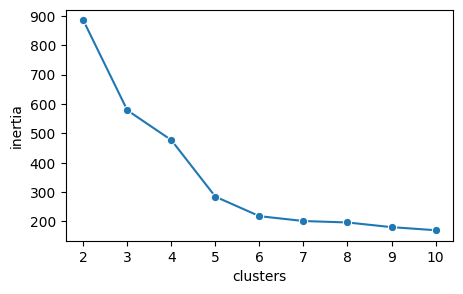

In [347]:
# create line plot.
plt.figure(figsize = (5,3))
sns.lineplot(x = num_clusters, y = inertia, marker = 'o')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

The line plot above shows the elbow at 6 clusters

## **Step 4: Results and evaluation** 

Now, to evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, we compare the silhouette score of each value of k, from 2 through 10. To do this, we write a function similar to the one for inertia above

In [293]:
# def function
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

Apply function to penguins_x_scaled

In [294]:
sil_score = kmeans_sil(num_clusters, penguins_x_scaled)
sil_score

[0.44398088353055243,
 0.45101024097188364,
 0.4489699212061027,
 0.519998574860868,
 0.5223086008347773,
 0.47386350642293157,
 0.4715443426463867,
 0.4160561489496056,
 0.418306343369105]

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.

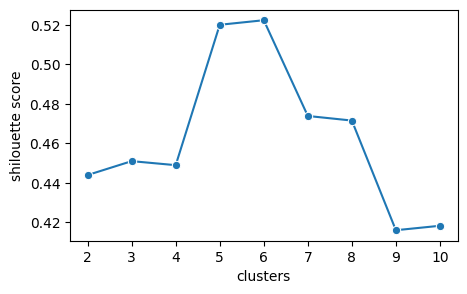

In [338]:
# create line plot.
plt.figure(figsize = (5,3))
sns.lineplot(x = num_clusters, y = sil_score, marker = 'o')
plt.xlabel('clusters')
plt.ylabel('shilouette score')
plt.show()

Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters. 

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although five clusters also yield a relatively good silhouette score.

### Optimal k-value

From our inertia and shilouette plots we can infer our optimal k-value to be equal to 6

In [348]:
# fit a 6-cluster model.
kmeansp = KMeans(n_clusters = 6, random_state = 42)
kmeansp.fit(penguins_x_scaled)

KMeans(n_clusters=6, random_state=42)

Print out the unique labels of the fit model.

In [349]:
# print unique labels.
print('Unique labels:', np.unique(kmeansp.labels_))

Unique labels: [0 1 2 3 4 5]


Now, we create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins` because it is often easier to interpret unscaled data.

In [351]:
# create a new column `cluster`.
penguins['cluster'] = kmeansp.labels_
penguins.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,5
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
4,Adelie,36.7,19.3,193.0,3450.0,0,2
5,Adelie,39.3,20.6,190.0,3650.0,1,5
6,Adelie,38.9,17.8,181.0,3625.0,0,2
7,Adelie,39.2,19.6,195.0,4675.0,1,5
12,Adelie,41.1,17.6,182.0,3200.0,0,2
13,Adelie,38.6,21.2,191.0,3800.0,1,5
14,Adelie,34.6,21.1,198.0,4400.0,1,5


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [329]:
penguins.groupby('cluster')['species'].value_counts()

cluster  species  
0        Chinstrap    32
1        Gentoo       58
2        Adelie       73
         Chinstrap     2
3        Chinstrap    34
         Adelie        2
4        Gentoo       61
5        Adelie       71
Name: count, dtype: int64

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

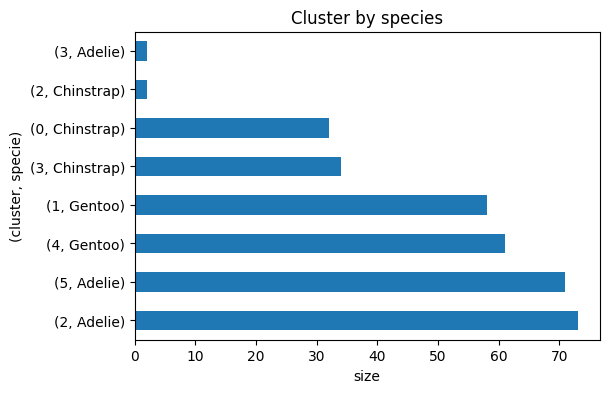

In [360]:
penguins.groupby('cluster')['species'].value_counts().sort_values(ascending = False).plot.barh(figsize = (6,4),
                                                                                              title = 'Cluster by species',
                                                                                              ylabel = '(cluster, specie)',
                                                                                              xlabel = 'size')
plt.show()

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` and `'sex'`.

In [305]:
penguins.groupby('cluster')[['species','sex']].value_counts()

cluster  species    sex
0        Chinstrap  0      32
1        Gentoo     0      58
2        Adelie     0      73
         Chinstrap  0       2
3        Chinstrap  1      34
         Adelie     1       2
4        Gentoo     1      61
5        Adelie     1      71
Name: count, dtype: int64

The groupby indicates the algorithm made clusters that are mostly differentiated by sex and species, with every single cluster having only a single sex and only two clusters having more than one species.

Finally, interpret the groupby outputs and visualize these results. 

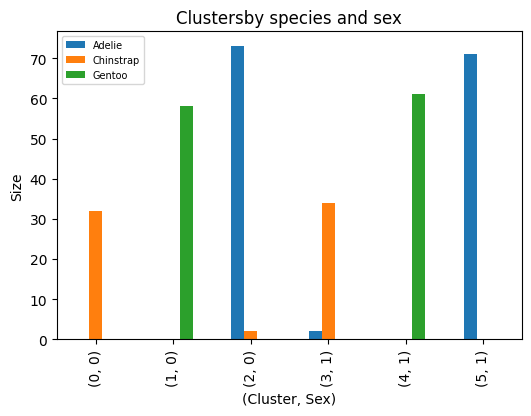

In [333]:
penguins.groupby('cluster')[['species','sex']].value_counts().unstack(level = 'species', fill_value=0).plot.bar(figsize=(6, 4),
                                                                                                                title='Clustersby species and sex', 
                                                                                                                ylabel='Size',
                                                                                                                xlabel='(Cluster, Sex)')
plt.legend(fontsize = 7)
plt.show()

The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

#### Review
- Our k-means model produced 6 clusters, which makes sense because the study suggests that there is sexual dimorphism (differences between the sexes) for each of the three species (2 sexes * 3 different species = 6 clusters). These patterns can educate staff members even more about the penguins.

- The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting staff education.
